In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
!pip install umap
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
# Загружаем набор данных с https://hdr.undp.org/data-center/human-development-index#/indicies/HDI
df = pd.read_csv('Human Development Index - Full.csv')

In [23]:
# Просматриваем первые пять строк набора данных
df.head()

,Human Development Index (2002),Life Expectancy at Birth (2002),Expected Years of Schooling (2002),Mean Years of Schooling (2002),Gross National Income Per Capita (2002)
0,0.362,56.4538,6.134050,1.522516,1267.628852
1,0.403,47.3865,5.414593,3.504403,4659.954466
2,0.689,75.8899,10.701520,8.888406,6920.555095
3,0.832,82.2368,11.036580,9.978296,50489.274910
4,0.804,74.9010,11.757349,8.685898,96736.925560


In [24]:
# Проверяем наличие пропущенных значений
df.isnull().sum()

Human Development Index (2002)             18
Life Expectancy at Birth (2002)             0
Expected Years of Schooling (2002)          7
Mean Years of Schooling (2002)             16
Gross National Income Per Capita (2002)     4
dtype: int64

In [25]:
# Проверяем наличие пропущенных значений
df.isnull()

,Human Development Index (2002),Life Expectancy at Birth (2002),Expected Years of Schooling (2002),Mean Years of Schooling (2002),Gross National Income Per Capita (2002)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
190,False,False,False,False,False
191,False,False,False,False,False
192,False,False,False,False,False
193,False,False,False,False,False


In [26]:
df.dropna().to_csv('output.csv')

In [27]:
df = pd.read_csv('output.csv')

In [28]:
df.head(200)

,Unnamed: 0,Human Development Index (2002),Life Expectancy at Birth (2002),Expected Years of Schooling (2002),Mean Years of Schooling (2002),Gross National Income Per Capita (2002)
0,0,0.362,56.4538,6.134050,1.522516,1267.628852
1,1,0.403,47.3865,5.414593,3.504403,4659.954466
2,2,0.689,75.8899,10.701520,8.888406,6920.555095
3,3,0.832,82.2368,11.036580,9.978296,50489.274910
4,4,0.804,74.9010,11.757349,8.685898,96736.925560
...,...,...,...,...,...,...
172,190,0.689,71.2761,12.045621,10.994547,5001.860828
173,191,0.468,63.9062,8.411410,1.464000,3516.398906
174,192,0.633,55.6662,13.162294,8.521600,11214.992930
175,193,0.434,46.9791,8.726917,5.798698,1978.769525


In [29]:
# Проверяем наличие пропущенных значений
df.isnull().sum()

Unnamed: 0                                 0
Human Development Index (2002)             0
Life Expectancy at Birth (2002)            0
Expected Years of Schooling (2002)         0
Mean Years of Schooling (2002)             0
Gross National Income Per Capita (2002)    0
dtype: int64

In [30]:
# Проверяем распределение целевой переменной (индекс развития человека)
df['Life Expectancy at Birth (2002)'].value_counts()

56.4538    1
64.8402    1
61.2679    1
72.0109    1
47.2214    1
          ..
58.6079    1
53.2782    1
57.0798    1
54.0851    1
44.5654    1
Name: Life Expectancy at Birth (2002), Length: 177, dtype: int64

In [31]:
# Преобразуем целевую переменную в бинарную (0 - низний индекс, 1 - высокий индекс) # (1)
df['Life Expectancy at Birth (2002)'] = df['Life Expectancy at Birth (2002)'].apply(lambda x: 0 if x < 65.0 else 1)
df.to_csv('binary.csv')

In [32]:
# Проверяем распределение целевой переменной (индекс развития человека)
df['Life Expectancy at Birth (2002)'].value_counts()

1    117
0     60
Name: Life Expectancy at Birth (2002), dtype: int64

In [33]:
import umap.umap_ as umap
fmnist = pd.read_csv('binary.csv') # считываем данные
embedding = umap.UMAP(n_neighbors=5).fit_transform(fmnist) # преобразовываем

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


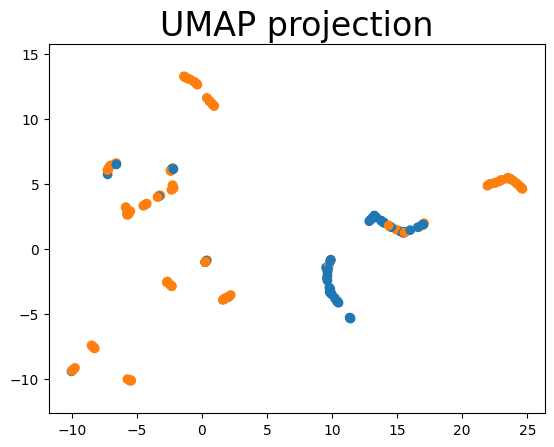

In [34]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in fmnist['Life Expectancy at Birth (2002)'].map({0:0, 1:1})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection', fontsize=24);

In [52]:
#Обучение персептрона
from sklearn.neural_network import MLPClassifier

In [125]:
X = df.drop('Life Expectancy at Birth (2002)', axis=1) # Выделяем признаки
y = df['Life Expectancy at Birth (2002)']
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)
test_y = test_y.values.reshape(1, -1)

In [110]:
X

,Unnamed: 0,Human Development Index (2002),Expected Years of Schooling (2002),Mean Years of Schooling (2002),Gross National Income Per Capita (2002)
0,0,0.362,6.134050,1.522516,1267.628852
1,1,0.403,5.414593,3.504403,4659.954466
2,2,0.689,10.701520,8.888406,6920.555095
3,3,0.832,11.036580,9.978296,50489.274910
4,4,0.804,11.757349,8.685898,96736.925560
...,...,...,...,...,...
172,190,0.689,12.045621,10.994547,5001.860828
173,191,0.468,8.411410,1.464000,3516.398906
174,192,0.633,13.162294,8.521600,11214.992930
175,193,0.434,8.726917,5.798698,1978.769525


In [49]:
model = MLPClassifier((128, 64), activation='relu')

In [50]:
model.fit(train_x, train_y)
y_hat = model.predict(test_x)

In [51]:
accuracy_score(test_y.reshape(-1), y_hat)

0.8055555555555556

In [54]:
#посмотрим с другими структурами
model = MLPClassifier((64, 32), activation='relu')
model.fit(train_x, train_y)
y_hat = model.predict(test_x)
accuracy_score(test_y.reshape(-1), y_hat)

0.6666666666666666

In [56]:
#попробуем поменять max_iter
model = MLPClassifier((128, 64), activation='relu', max_iter=500) #default max_iter=200
model.fit(train_x, train_y)
y_hat = model.predict(test_x)
accuracy_score(test_y.reshape(-1), y_hat)

0.8055555555555556

In [66]:
#попробуем поменять activation на tanh
model = MLPClassifier((128, 64), activation='tanh') #default activation='relu'
model.fit(train_x, train_y)
y_hat = model.predict(test_x)
accuracy_score(test_y.reshape(-1), y_hat)

0.8333333333333334

In [68]:
#попробуем поменять activation на identity
model = MLPClassifier((128, 64), activation='identity') #default activation='relu'
model.fit(train_x, train_y)
y_hat = model.predict(test_x)
accuracy_score(test_y.reshape(-1), y_hat)

0.6666666666666666

In [67]:
#попробуем поменять activation на logistic
model = MLPClassifier((128, 64), activation='logistic') #default activation='relu'
model.fit(train_x, train_y)
y_hat = model.predict(test_x)
accuracy_score(test_y.reshape(-1), y_hat)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8611111111111112

In [73]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [132]:
#Обучение рекурентной нейронной сети
model = keras.Sequential()
model.add(layers.Dense(128, activation="sigmoid", kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(layers.Dense(128, activation="tanh", kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(layers.Dense(2, activation="softmax"))
model.compile(keras.optimizers.SGD(learning_rate=0.001),
          keras.losses.MeanSquaredError(reduction='sum'),
          metrics=['accuracy']
         )

In [133]:
train_y2 = []
for y in train_y:
    y2 = np.zeros(2)
    y2[y] = 1
    train_y2.append(y2)

test_y2 = []
for y in test_y:
    y2 = np.zeros(2)
    y2[y] = 1
    test_y2.append(y2)

train_y2 = np.array(train_y2)
test_y2 = np.array(test_y2)

In [115]:
train_y2

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.

In [140]:
model.fit(train_x, train_y2, epochs=200, batch_size=10, validation_split=0.5)

Epoch 1/200
7/7 [==============================] - 0s 20ms/step - loss: 2.2786 - accuracy: 0.7000 - val_loss: 1.6623 - val_accuracy: 0.7333
Epoch 2/200
7/7 [==============================] - 0s 22ms/step - loss: 2.2569 - accuracy: 0.7000 - val_loss: 1.6664 - val_accuracy: 0.7333
Epoch 3/200
7/7 [==============================] - 0s 17ms/step - loss: 2.2453 - accuracy: 0.7000 - val_loss: 1.6760 - val_accuracy: 0.7333
Epoch 4/200
7/7 [==============================] - 0s 21ms/step - loss: 2.2447 - accuracy: 0.7000 - val_loss: 1.6819 - val_accuracy: 0.7333
Epoch 5/200
7/7 [==============================] - 0s 24ms/step - loss: 2.2554 - accuracy: 0.7000 - val_loss: 1.6922 - val_accuracy: 0.7333
Epoch 6/200
7/7 [==============================] - 0s 21ms/step - loss: 2.2393 - accuracy: 0.7000 - val_loss: 1.6926 - val_accuracy: 0.7333
Epoch 7/200
7/7 [==============================] - 0s 13ms/step - loss: 2.2571 - accuracy: 0.7000 - val_loss: 1.6754 - val_accuracy: 0.7333
Epoch 8/200
7/7 [===

In [172]:
#Обучим сверточную сеть
model = keras.Sequential()
model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(141, activation="softmax"))

model.compile(keras.optimizers.Adam(learning_rate=0.001), keras.losses.MeanSquaredError(reduction='sum'))

In [168]:
train_x3 = train_x.values.reshape(-1, 705, 1)
train_y3 = train_y.values.reshape(-1, 141, 1)
test_x3 = test_x.values.reshape(-1, 180, 1)
test_y3 = test_y.reshape(-1, 36, 1)

In [183]:
model.fit(train_x3, train_y3, epochs=20, batch_size=10)

Epoch 1/20
1/1 [==============================] - 0s 48ms/step - loss: 0.6525
Epoch 2/20
1/1 [==============================] - 0s 42ms/step - loss: 0.6525
Epoch 3/20
1/1 [==============================] - 0s 41ms/step - loss: 0.6525
Epoch 4/20
1/1 [==============================] - 0s 45ms/step - loss: 0.6525
Epoch 5/20
1/1 [==============================] - 0s 41ms/step - loss: 0.6525
Epoch 6/20
1/1 [==============================] - 0s 43ms/step - loss: 0.6525
Epoch 7/20
1/1 [==============================] - 0s 43ms/step - loss: 0.6525
Epoch 8/20
1/1 [==============================] - 0s 45ms/step - loss: 0.6525
Epoch 9/20
1/1 [==============================] - 0s 45ms/step - loss: 0.6525
Epoch 10/20
1/1 [==============================] - 0s 42ms/step - loss: 0.6525
Epoch 11/20
1/1 [==============================] - 0s 41ms/step - loss: 0.6525
Epoch 12/20
1/1 [==============================] - 0s 50ms/step - loss: 0.6525
Epoch 13/20
1/1 [==============================] - 0s 47ms/st